In [1]:
%matplotlib notebook

In [2]:
 %matplotlib inline

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

#make sure they came out right!
#print(city_data.head())
#print(ride_data.head())

# Combine the data into a single dataset
merged_data = pd.merge(ride_data, city_data, on = "city", how = "inner")
merged_data.head()

#group by city and fare
clean_merge = merged_data.drop_duplicates(subset='city', keep='first')

# Display the data table for preview
clean_merge.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
24,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
55,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
80,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
103,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [5]:
##Bubble Plot of Ride Sharing Data ## look at the mpg activity
#make type the index!
merged_data = merged_data.set_index('type')
merged_data.head()

#get data for just the types of cities
#get urban, suburban, and rural datasets!
urban_df = merged_data[merged_data.index == "Urban"]

sub_df = merged_data[merged_data.index == "Suburban"]

rural_df = merged_data[merged_data.index == "Rural"]

In [6]:
#see if it worked!

urban_df.head()
sub_df.head()
rural_df.head()

,city,date,fare,ride_id,driver_count
type,,,,,
Rural,Randallchester,2018-04-13 11:13:31,43.22,1076079536213,9
Rural,Randallchester,2018-02-19 03:52:47,58.55,8004803682564,9
Rural,Randallchester,2018-02-11 05:42:29,25.78,9010611749008,9
Rural,Randallchester,2018-03-25 13:36:46,10.37,3216382725494,9
Rural,Randallchester,2018-04-07 23:42:07,10.79,1615474447641,9


In [7]:
# Obtain the x and y coordinates for each of the three city types
##URBAN DATA
urban_grouped = urban_df.groupby(['city'])
urban_count = urban_grouped['driver_count'].sum()
urban_average_fare = urban_grouped['fare'].mean()
urban_ride_count = urban_grouped['ride_id'].count()

#---------------------------------------------------------------------
##SUBURB DATA
sub_grouped = sub_df.groupby(['city'])
sub_count = sub_grouped['driver_count'].sum()
sub_average_fare = sub_grouped['fare'].mean()
sub_ride_count = sub_grouped['ride_id'].count()
#---------------------------------------------------------------------------
##RURAL DATA
rural_grouped = rural_df.groupby(['city'])
rural_count = rural_grouped['driver_count'].sum()
rural_average_fare = rural_grouped['fare'].mean()
rural_ride_count = rural_grouped['ride_id'].count()

In [8]:
rural_average_fare

city
Bradshawfurt         40.064000
Garzaport            24.123333
Harringtonfort       33.470000
Jessicaport          36.013333
Lake Jamie           34.358333
Lake Latoyabury      26.061818
Michaelberg          34.997500
New Ryantown         43.278333
Newtonview           36.745000
North Holly          29.130000
North Jaime          30.802500
Penaborough          35.246000
Randallchester       29.742000
South Jennifer       35.264286
South Marychester    41.870000
South Saramouth      36.160000
Taylorhaven          42.263333
West Heather         33.890000
Name: fare, dtype: float64

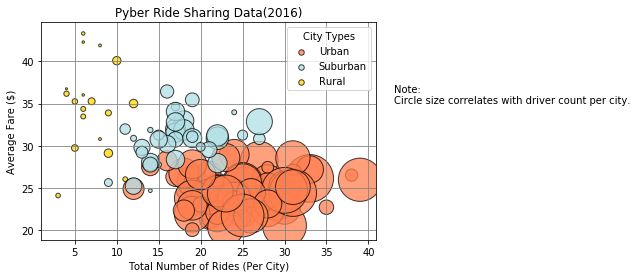

In [9]:
# Build the scatter plots for each city types

plt.rc('grid', linestyle="-", color='gray')
urban_plt = plt.scatter(urban_ride_count, urban_average_fare, marker="o", facecolors="coral", edgecolors="black",
            s=urban_count, alpha=0.75)
sub_plt = plt.scatter(sub_ride_count, sub_average_fare, marker="o", facecolors="powderblue", edgecolors="black",
            s=sub_count, alpha=0.75)

rural_plt = plt.scatter(rural_ride_count, rural_average_fare, marker="o", linestyle="-", color = "black", facecolors="gold", edgecolors="black",
            s=rural_count, alpha=0.75)
plt.grid(True)

# Incorporate a text label regarding circle size
textstr = "Note:\nCircle size correlates with driver count per city."
plt.text(43, 35, textstr, fontsize=10)

# Create a legend
lgnd = plt.legend([urban_plt, sub_plt, rural_plt, (urban_plt, sub_plt, rural_plt)], ["Urban", "Suburban", "Rural"], title = "City Types")

#change legend size manually
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate the other graph properties
# Create a title, x label, and y label for our chart
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Save Figure
plt.savefig("Pyber_Ride_Sharing_Data_isoto.png")

In [10]:
##Total Fares by City Type

#merge data by type
py_data = merged_data.groupby(['type'])

#calculate total fare's by types
py_fares = py_data['fare'].sum()


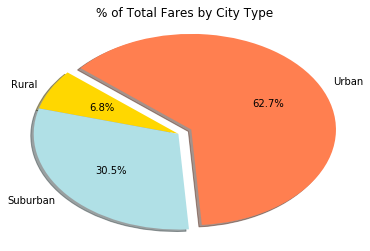

In [14]:
# Build Pie Chart

explode = (0, 0, 0.1)
colors = ["gold", "powderblue", "coral"]
types = ["Rural", "Suburban", "Urban"]

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(py_fares, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("auto")

plt.title("% of Total Fares by City Type")


# Save Figure
plt.savefig("percent_of_Total_Fares_isoto.png")

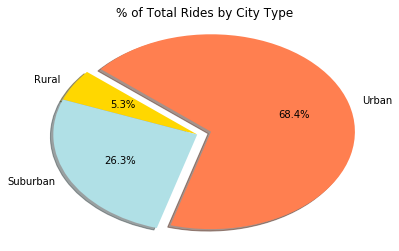

In [15]:
 # Calculate Ride Percents
py_ride = py_data['ride_id'].count()

# Build Pie Chart
plt.pie(py_ride, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("auto") 

plt.title("% of Total Rides by City Type")


# Save Figure
plt.savefig("percent_of_Total_ Rides_isoto.png")

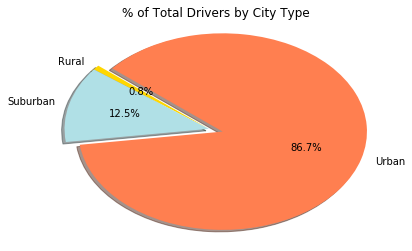

In [16]:
# Calculate Driver Percents
py_drive = py_data['driver_count'].sum()

# Build Pie Charts
plt.pie(py_drive, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("auto")

plt.title("% of Total Drivers by City Type")


# Save Figure
plt.savefig("percent_of_Total_Drivers_isoto.png")